##Rwanda CO2 Model

The project at hand addresses a significant gap in carbon emissions monitoring in Africa. While developed regions have advanced systems to track emissions, Africa lacks in this critical infrastructure. The objective is to create machine learning models capable of predicting future carbon emissions based on data from the Sentinel-5P satellite. This approach could potentially provide a means for governments and organizations in Africa to estimate emissions where on-the-ground monitoring is not available, aiding in the broader effort to combat climate change.

In [ ]:
!pip install pycaret --upgrade
!pip install shap
!pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.3 MB/s eta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.4 which is incompatible.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Rwanda Data/train.csv')

# Display the first few rows of the dataset to understand its structure
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


##Data Pre-processing and Exploration

First, we'll do a bit of data engineering to make this dataset work for analysis. Then, we'll check our assumptions - data distribution & outliers, feature relationships, and then time series specifics.

In [ ]:
# Combine 'year' and 'week_no' into a single column
df['date'] = df['year'].astype(str) + '-W' + df['week_no'].astype(str)

# Convert the 'date' column to datetime (note: the day of the week defaults to Monday)
df['date'] = pd.to_datetime(df['date'] + '-1', format='%Y-W%W-%w')

# Sort the DataFrame by the new 'date' column
df.sort_values('date', inplace=True)

In [ ]:
# Creating a lag of 1 week - adding historical context to each week of
# what the previous week looked like.
df['emission_lag1'] = df['emission'].shift(1)

In [ ]:
# Rolling mean for the past 4 weeks - adding historical context to each
# week of the general trend it can be compared to.
df['rolling_mean_4'] = df['emission'].rolling(window=4).mean()

In [ ]:
# Dropping initial rows where lag and rolling mean features are missing,
# as these missing values are a result of creating new time-dependent features.
df = df.dropna(subset=['emission_lag1', 'rolling_mean_4'])

In [ ]:
# Dropping the identifier column
df.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)

In [ ]:
# Forward fill to handle missing values in time-dependent features -
# this preserves the temporal integrity of this data
df['emission'].fillna(method='ffill', inplace=True)
df['emission_lag1'].fillna(method='ffill', inplace=True)
df['rolling_mean_4'].fillna(method='ffill', inplace=True)

# Identify columns that are not time-dependent and also not of datetime type
non_time_dependent_columns = df.columns.difference(['emission', 'emission_lag1', 'rolling_mean_4', 'date'])

# Use mean imputation for these columns - reduces bias and fills the columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[non_time_dependent_columns] = imputer.fit_transform(df[non_time_dependent_columns])

# Assess columns with a high percentage of missing values
missing_values = df.isnull().sum() / len(df)
missing_columns = missing_values[missing_values > 0].index.tolist()

# Review these columns to decide whether to impute or drop
print("Columns with missing values:", missing_columns)


Columns with missing values: []


##Data Distribution & Outliers
Normality & Outliers

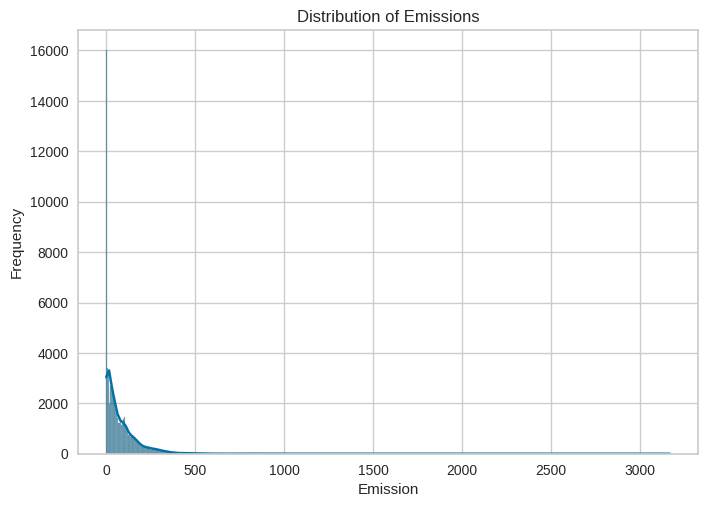

In [ ]:
# Distribution of the target variable
sns.histplot(df['emission'], kde=True)
plt.title('Distribution of Emissions')
plt.xlabel('Emission')
plt.ylabel('Frequency')
plt.show()

This data is heavily skewed, but since I'm looking to practice my use of tree-based models, I'm not going to transform the emmissions variable. I'll make a note to ignore the output of the linear models that will struggle with skewness.

## Feature Relationships
Correlation Analysis & Pair Plots

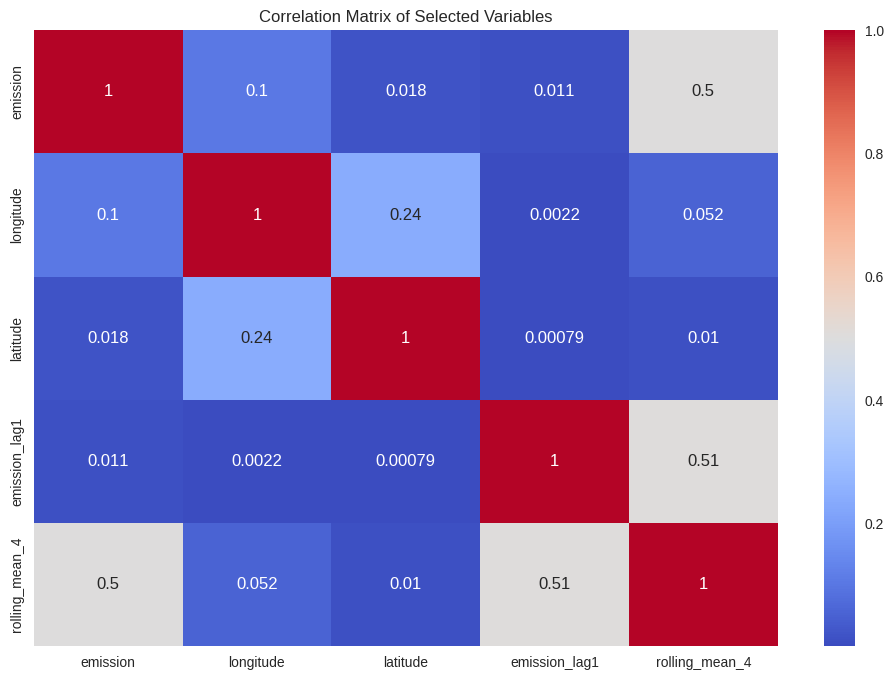

In [ ]:
# Creating a subset of the DataFrame with the key variables
subset_df = df[['emission', 'longitude', 'latitude', 'emission_lag1', 'rolling_mean_4']]

# Calculating the correlation matrix for the subset
correlation_matrix = subset_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Variables')
plt.show()

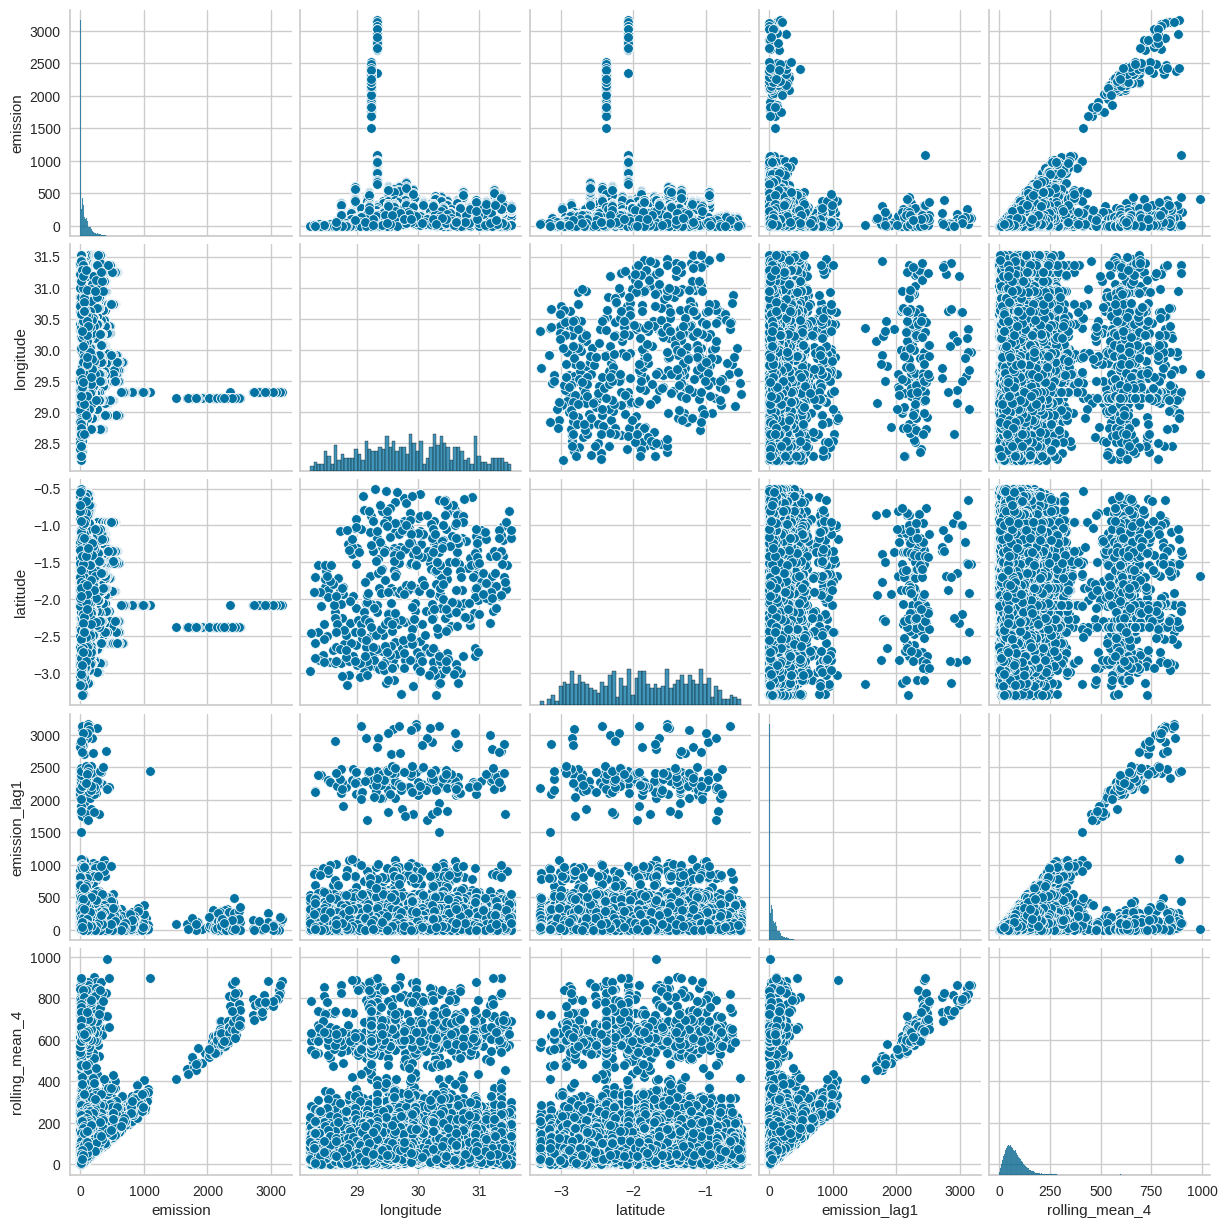

In [ ]:
# Pair plot for key variables
sns.pairplot(df[['emission', 'longitude', 'latitude', 'emission_lag1', 'rolling_mean_4']])
plt.show()

Our correlation matrix shows very little colinearity, which is a good sign.

The pair plot shows some clustering in specific locations, but since we're focusing on tree-based models, the relationships in the data become less of an issue.

##Time Series Specifics
Stationarity & Temporal Dependencies

In [ ]:
# Assuming 'emission' is your time series data
result = adfuller(df['emission'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# interpreting the p-value result
if result[1] < 0.05:
    print("The series is stationary")
else:
    print("The series is not stationary")


ADF Statistic: -30.988239
p-value: 0.000000
The series is stationary


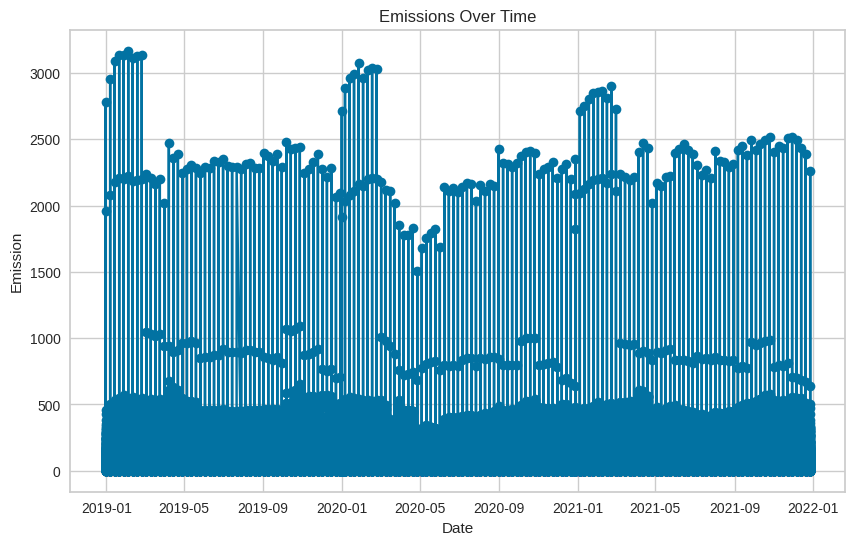

In [ ]:
# Plotting the time series of emissions
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['emission'], marker='o')
plt.title('Emissions Over Time')
plt.xlabel('Date')
plt.ylabel('Emission')
plt.show()

The series definitely has some trends - for examplethere is a jump in emmissions for the first few months every year. But overall, the series is stationary, meaning that the emissions don't consistently go up or down over time; they fluctuate around the same average value without a clear long-term trend upwards or downwards.

##Pycaret Setup

We'll run an initial Pycaret analysis to find an efficient model with high R2 and low error rates. Then we'll examine the features that are most important, and use those to train our final model.

In [ ]:
# Use data from the last year as the test set
train_set = df[df['year'] < 2021]
test_set = df[df['year'] == 2021]

In [ ]:
# Set up the Pycaret analysis
setup(data=train_set, target='emission', session_id=123)

,Description,Value
0,Session id,123
1,Target,emission
2,Target type,Regression
3,Original data shape,"(52679, 78)"
4,Transformed data shape,"(52679, 80)"
5,Transformed train set shape,"(36875, 80)"
6,Transformed test set shape,"(15804, 80)"
7,Numeric features,76
8,Date features,1
9,Preprocess,True


In [ ]:
# evaluate different regression models on the dataset
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,19.4719,1256.5783,34.9303,0.9408,0.9280,19.0963,4.2130
lightgbm,Light Gradient Boosting Machine,26.2319,1964.9213,43.5928,0.9052,1.1059,32.9890,7.8930
rf,Random Forest Regressor,24.2799,2187.0416,46.1243,0.8935,0.8828,21.5481,262.9580
et,Extra Trees Regressor,31.4792,2874.8987,53.5276,0.8614,1.0908,29.6531,72.2240
dt,Decision Tree Regressor,29.2057,4213.2743,64.0259,0.7949,0.9535,21.6238,4.1190
gbr,Gradient Boosting Regressor,40.8437,4513.9592,66.8184,0.7771,1.3469,51.6250,84.2490
ada,AdaBoost Regressor,73.6923,8055.3227,89.6438,0.6088,1.9907,123.1133,18.2200
lr,Linear Regression,57.9987,13702.8267,116.7087,0.3492,1.5588,52.8438,1.0820
ridge,Ridge Regression,57.9787,13711.5302,116.7465,0.3488,1.5566,52.4013,0.2840
br,Bayesian Ridge,58.1914,13758.2452,116.9484,0.3464,1.5623,53.9702,0.6680


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Running this took 1 hr 18 min.

In [ ]:
# I decided to go with xgboost because it uses way less computing power than random forest, while still producing a high r-squared value
# we'll use this to efficiently perform feature selection, then pick the best model based on those features.

# Create the XGboost model
xgboost_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.6239,1086.8785,32.9678,0.9571,0.9242,19.9939
1,19.3359,1022.1361,31.9709,0.9617,0.9776,16.6546
2,19.6030,996.0321,31.5600,0.9275,0.9076,12.9902
3,19.1440,1105.4944,33.2490,0.9442,0.9716,11.6656
4,19.1463,1015.5321,31.8674,0.9462,0.9121,15.5770
5,20.6206,2304.3623,48.0038,0.9104,0.9627,24.4825
6,19.5527,1779.5417,42.1846,0.9175,0.8956,27.1176
7,18.7503,815.5194,28.5573,0.9454,0.9077,21.0033
8,20.0903,1609.4966,40.1185,0.9369,0.9411,20.3315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost = tune_model(xgboost_model, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.4766,869.2050,29.4823,0.9657,0.8591,12.6486
1,17.4366,811.0878,28.4796,0.9696,0.9125,10.4593
2,18.0090,869.3878,29.4854,0.9367,0.8823,12.9519
3,18.3290,1676.8975,40.9499,0.9154,0.9524,11.5884
4,17.9679,923.6711,30.3920,0.9510,0.8947,17.5080
5,19.1509,3062.0254,55.3356,0.8809,0.9052,22.9787
6,17.6582,1384.4722,37.2085,0.9358,0.8496,16.9963
7,17.8591,849.2249,29.1415,0.9432,0.8905,16.7219
8,18.1195,1150.9595,33.9258,0.9549,0.8618,16.3150


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Takes 21 minutes to run.

In [ ]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# there are four features that contribute way more than the rest, so lets try making a subset for efficiency and interpretability, then running our model again.

subset_train = train_set[['longitude', 'latitude', 'rolling_mean_4', 'emission_lag1', 'emission']]
subset_test = test_set[['longitude', 'latitude', 'rolling_mean_4', 'emission_lag1', 'emission']]

setup(data=subset_train, target='emission', session_id=123)

,Description,Value
0,Session id,123
1,Target,emission
2,Target type,Regression
3,Original data shape,"(52679, 5)"
4,Transformed data shape,"(52679, 5)"
5,Transformed train set shape,"(36875, 5)"
6,Transformed test set shape,"(15804, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


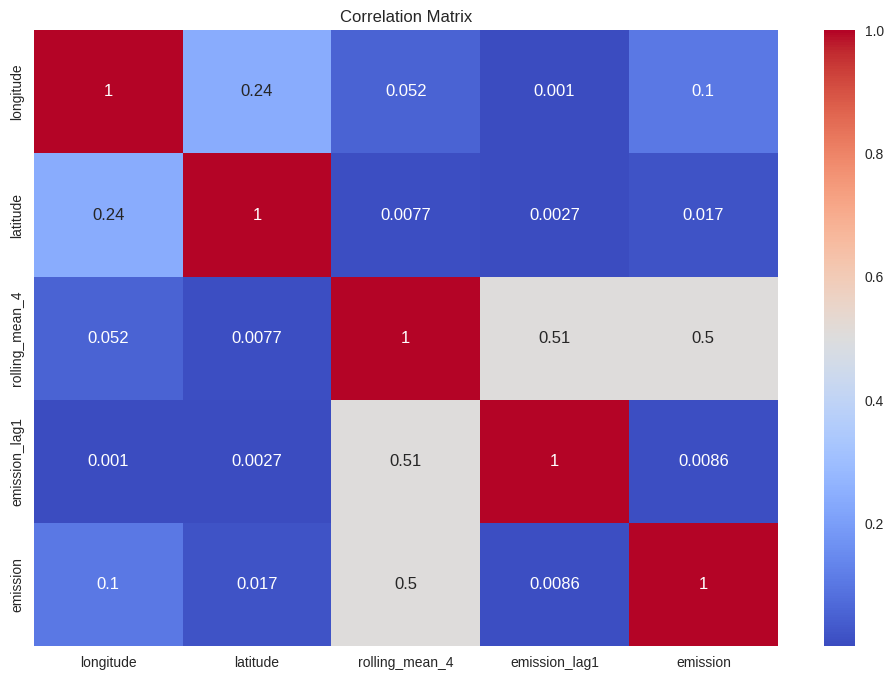

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(subset_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# evaluate different regression models on the dataset
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,17.3456,1226.5125,33.9806,0.9431,0.7700,11.9007,0.5280
et,Extra Trees Regressor,21.1222,1388.8564,37.2185,0.9326,0.8208,14.3286,6.4340
rf,Random Forest Regressor,17.6468,1513.2640,38.1190,0.9265,0.6545,8.2792,16.4320
lightgbm,Light Gradient Boosting Machine,24.1996,1723.2943,40.7844,0.9158,1.0491,29.0860,0.6760
dt,Decision Tree Regressor,21.8067,2737.4940,51.7683,0.8664,0.7019,6.8996,0.3190
gbr,Gradient Boosting Regressor,39.9899,4161.2923,64.1906,0.7940,1.3384,50.2287,4.2960
ada,AdaBoost Regressor,68.7471,7524.7273,86.4445,0.6388,1.9441,112.6380,0.8990
br,Bayesian Ridge,58.4071,13811.1623,117.1740,0.3439,1.5619,56.6352,0.0290
lar,Least Angle Regression,58.4079,13811.1354,117.1737,0.3439,1.5617,56.5364,0.0270
ridge,Ridge Regression,58.4079,13811.1356,117.1737,0.3439,1.5617,56.5367,0.0290


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Unsuprisingly, the models ran way faster with 4 features than with 76 (5 minutes vs 1 hr 18 minutes). XGBoost continues to be the best model, so we'll stick with it and tune our new subset model.

In [ ]:
# Create the XGboost model
xgboost_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16.5550,794.7286,28.1909,0.9686,0.7661,13.4703
1,17.1813,839.0435,28.9662,0.9686,0.7923,8.4857
2,17.1394,792.1107,28.1445,0.9423,0.7533,12.1319
3,17.4664,954.4528,30.8942,0.9519,0.8458,8.7416
4,16.9399,957.7922,30.9482,0.9492,0.7544,9.5677
5,18.7505,2966.2131,54.4630,0.8846,0.7837,16.5278
6,18.0421,1776.0387,42.1431,0.9176,0.7326,11.8829
7,16.6794,760.6313,27.5795,0.9491,0.7395,11.0540
8,17.3451,1644.1112,40.5476,0.9355,0.7600,12.8477


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xgboost = tune_model(xgboost_model, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.3232,767.1075,27.6967,0.9697,0.6669,6.2600
1,15.6125,791.0166,28.1250,0.9704,0.7295,7.3914
2,15.6024,716.0601,26.7593,0.9479,0.6676,7.1937
3,15.4944,1294.4661,35.9787,0.9347,0.7435,6.0028
4,15.8911,915.5859,30.2586,0.9515,0.7079,10.7469
5,16.9766,1907.6154,43.6763,0.9258,0.7130,10.0325
6,16.3574,1090.6926,33.0256,0.9494,0.6541,8.7315
7,15.3556,727.3764,26.9699,0.9513,0.6851,8.8277
8,15.3291,1145.0505,33.8386,0.9551,0.6736,8.9698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


The tuning of this model took more compute power than google colab could handle. It's already pretty great, so lets continue with the model we have.

In [ ]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

We can see again under the 'feature importance' tab that all four predictors are contributing to this model.

The tuned XGboost model had a MAE of 17.93, a MSE of 1236.8766, a RMSE of	34.2182, an r2 value of 0.9417, an RMSLE of	0.8861, and a MaPE of	15.7892

After subsetting down to four variables, our XGboost model had a MAE of 15.7220, a MSE of 1005.0495, a RMSE of	31.2702, an r2 value of 0.9523, an RMSLE of	0.6934, and a MaPE of	8.5556

##Mean Absolute Error (MAE)
What It Is: MAE measures the average error in your predictions. It's like taking all the mistakes the model made, ignoring whether they were over or under-predictions, averaging them out.

XGBoost: MAE of 17.93 means, on average, the model's predictions were off by 17.93 units.

Subset XGboost: MAE of 15.7220 is lower, meaning it was, on average, only off by 15.7220 units. It made smaller mistakes.


##Mean Squared Error (MSE)
What It Is: MSE also looks at the mistakes but squares them before averaging. This makes bigger errors stand out more.

XGBoost: MSE of 1236.8766 means that when you square the model's errors and average them, you get 1236.8766.

Subset XGboost: MSE of 1005.0495 is lower, showing that its errors, especially the bigger ones, are less significant.


##Root Mean Squared Error (RMSE)
What It Is: RMSE is just the square root of MSE. It brings the error metric back to the same scale as your original data.

XGboost: RMSE of 34.2182 means the model’s typical error was about 16 units.

Subset XGboost: RMSE of 31.2702 indicates a smaller typical error, making it more accurate on this scale.



##Root Mean Squared Logarithmic Error (RMSLE)
What It Is: RMSLE first takes the logarithm of the predictions and actual values before calculating the RMSE. It's more sensitive to relative errors than absolute ones.

XGBoost: RMSLE of 0.8861 suggests more significant relative errors.

Subset XGboost: RMSLE of 0.6934 is lower, indicating smaller relative errors.


##Mean Absolute Percentage Error (MaPE)

What It Is: MaPE tells you the error as a percentage of the actual values. It's useful to understand the error in terms of the size of the things you're predicting.

XGBoost: MaPE of 15.7892% means the model's predictions were off by about 15.7892% on average.

Subset XGboost: MaPE of 8.5556% is much lower, meaning its predictions were, on average, only about 8.5556% off.


##R-Squared (r2)
What It Is: R-squared shows how well your model's predictions match the actual values. It's like a score for how good the model is. A score of 1 is perfect, and a score closer to 0 is worse.

XGBoost: An r2 of 0.9417 means it's doing a great job, explaining about 94.17% of the variation in your data.

Subset XGboost: An r2 of 0.9523 is even better, explaining about 95.23% of the variation.


Summary
Extra Trees vs. XGBoost: Across all these metrics, the Extra Trees model with just four variables (longitude, latitude, rolling_mean_4, and emission_lag1) outperformed the tuned XGBoost model. It was more accurate (lower MAE, MSE, RMSE), made smaller relative errors (lower RMSLE), and was closer to actual values in percentage terms (lower MaPE). This suggests that focusing on just those key variables made the Extra Trees model more efficient and precise in this case.

##Findings:

The project has successfully employed machine learning techniques to predict carbon emissions in areas of Africa where direct measurement is not feasible. Using the Sentinel-5P satellite data, we developed a model that offers a reliable estimation of emissions. The XGBoost model performed well, explaining over 95% of the variability in the data and providing a solid foundation for estimating emissions. The accuracy of the model, as indicated by various error metrics, shows promise for its use in practical applications.

Moving forward, there is room for improvement and further research. Potential next steps include incorporating additional data sources to refine predictions, applying different modeling techniques, and expanding the scope to include other regions. The ultimate goal remains to support efforts in monitoring and mitigating carbon emissions more effectively across the continent.